<a href="https://colab.research.google.com/github/bernardogoltz/datascience_python_probabilidade/blob/main/amostragem_e_estimacao.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **AMOSTRAGEM**


### **POPULAÇÃO**


Elementos de interesse em um estudo. Pessoas, idades, alturas, carros etc

1.   POPULAÇÕES FINITAS
2.   POPULAÇÕES INFINITAS


###amostra = 
subconjunto representativo da população que representa as estatisticas da população inteira

### **amostragem aleatoria simples**


In [6]:
import pandas as pd
dados = pd.read_csv('dados.csv')
dados.head()

,UF,Sexo,Idade,Cor,Anos de Estudo,Renda,Altura
0,11,0,23,8,12,800,1.603808
1,11,1,23,2,12,1150,1.739790
2,11,1,35,8,15,880,1.760444
3,11,0,46,2,6,3500,1.783158
4,11,1,47,8,9,150,1.690631


In [7]:
dados.shape[0]

76840

In [8]:
dados.Renda.mean()

2000.3831988547631

In [9]:
amostra = dados.sample(n = 100)
amostra.head()

,UF,Sexo,Idade,Cor,Anos de Estudo,Renda,Altura
48629,35,0,38,8,12,3500,1.656517
22177,26,0,45,2,10,1200,1.612112
66501,43,0,41,2,8,3000,1.727192
14889,23,1,46,8,12,800,1.676318
39249,31,1,36,2,10,1311,1.727289


In [10]:
amostra.shape[0]

100

In [11]:
amostra.Renda.mean()

1961.91

In [12]:
dados.Sexo.value_counts(normalize = True)

0    0.692998
1    0.307002
Name: Sexo, dtype: float64

In [13]:
amostra.Sexo.value_counts(normalize=True)

0    0.72
1    0.28
Name: Sexo, dtype: float64

# ***Estimação***

### Teorema do Limite Central

In [14]:
n = 2000
total_de_amostras = 150

amostras = pd.DataFrame()
amostras

""


In [15]:
for i in range(total_de_amostras):
    _ = dados.Idade.sample(n)
    _.index = range(0,len(_))
    amostras['Amostra_'+str(i)] = _

amostras

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  after removing the cwd from sys.path.


,Amostra_0,Amostra_1,Amostra_2,Amostra_3,Amostra_4,Amostra_5,Amostra_6,Amostra_7,Amostra_8,Amostra_9,Amostra_10,Amostra_11,Amostra_12,Amostra_13,Amostra_14,Amostra_15,Amostra_16,Amostra_17,Amostra_18,Amostra_19,Amostra_20,Amostra_21,Amostra_22,Amostra_23,Amostra_24,Amostra_25,Amostra_26,Amostra_27,Amostra_28,Amostra_29,Amostra_30,Amostra_31,Amostra_32,Amostra_33,Amostra_34,Amostra_35,Amostra_36,Amostra_37,Amostra_38,Amostra_39,...,Amostra_110,Amostra_111,Amostra_112,Amostra_113,Amostra_114,Amostra_115,Amostra_116,Amostra_117,Amostra_118,Amostra_119,Amostra_120,Amostra_121,Amostra_122,Amostra_123,Amostra_124,Amostra_125,Amostra_126,Amostra_127,Amostra_128,Amostra_129,Amostra_130,Amostra_131,Amostra_132,Amostra_133,Amostra_134,Amostra_135,Amostra_136,Amostra_137,Amostra_138,Amostra_139,Amostra_140,Amostra_141,Amostra_142,Amostra_143,Amostra_144,Amostra_145,Amostra_146,Amostra_147,Amostra_148,Amostra_149
0,52,57,50,69,38,23,62,28,27,37,41,53,75,55,43,44,44,58,62,41,37,41,61,33,35,37,53,59,22,30,31,53,55,56,30,37,35,34,26,34,...,21,35,31,46,27,39,44,33,52,45,28,48,52,38,29,29,30,51,38,37,35,29,31,45,23,73,46,32,59,52,49,37,58,29,43,56,28,40,19,30
1,38,64,53,47,73,47,36,40,27,68,46,62,56,33,32,71,58,50,58,59,32,44,30,36,59,46,63,41,35,53,54,30,51,46,37,57,56,61,48,37,...,30,64,38,51,67,62,27,40,49,39,52,31,59,51,56,31,65,51,45,44,28,49,53,26,61,52,21,30,28,70,36,29,58,57,50,38,33,45,37,50
2,47,31,62,47,69,70,58,71,55,77,35,28,40,40,38,55,58,21,25,46,59,41,53,29,54,43,27,30,68,54,54,69,50,47,50,37,42,40,48,31,...,49,36,32,54,28,65,29,42,54,55,46,33,78,48,44,32,35,32,34,29,39,57,57,51,29,60,36,25,38,28,53,66,54,26,25,53,34,35,60,37
3,28,46,29,58,60,57,29,50,35,50,28,32,50,31,62,23,34,39,55,44,56,41,30,33,50,38,46,35,34,63,38,40,24,40,35,52,66,34,31,53,...,21,37,46,31,22,36,30,28,39,57,55,56,58,31,39,47,30,28,54,61,33,27,47,28,52,47,48,45,45,32,49,50,42,43,43,44,45,40,46,36
4,32,38,42,38,38,45,32,51,49,46,39,30,39,65,39,52,40,47,51,37,28,66,33,51,48,24,37,26,42,50,49,37,32,35,33,78,45,36,39,50,...,42,30,30,30,30,33,44,38,23,30,65,48,38,45,54,65,45,52,33,40,37,60,50,35,35,57,25,60,35,64,53,25,34,59,30,28,47,46,39,23
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,63,46,31,57,60,49,37,39,33,45,60,34,31,40,21,25,34,21,30,27,24,35,55,29,53,64,58,55,43,44,29,32,44,23,24,31,42,52,44,35,...,49,46,56,37,19,48,38,67,47,53,42,43,40,26,44,38,37,63,33,56,47,40,39,50,45,24,35,30,47,35,68,49,44,29,53,34,52,49,25,34
1996,25,35,33,44,49,23,41,27,62,36,36,27,40,37,31,58,34,61,43,47,31,28,49,30,23,51,57,33,37,25,46,24,41,44,42,68,30,42,21,38,...,44,32,50,44,35,32,50,30,37,39,39,64,34,24,37,25,28,37,62,42,39,54,54,33,56,28,25,66,69,29,48,70,35,50,38,38,61,65,53,28
1997,40,56,63,51,34,25,55,32,70,41,48,58,62,58,27,37,28,51,39,61,70,29,44,37,27,39,56,20,48,53,38,51,57,34,43,39,33,46,51,45,...,35,53,56,35,68,50,29,40,33,28,38,35,62,41,40,59,65,33,66,67,51,31,48,50,60,46,65,35,63,32,35,41,56,50,40,33,25,37,37,60
1998,46,19,30,61,55,64,37,28,67,33,48,73,35,59,70,40,48,44,36,36,27,44,69,37,28,23,32,35,23,34,43,50,79,18,41,36,53,35,57,63,...,48,38,48,32,51,25,55,54,36,34,31,30,74,45,52,55,38,36,52,53,57,65,54,48,35,62,35,49,38,24,31,22,33,56,32,44,31,45,54,53


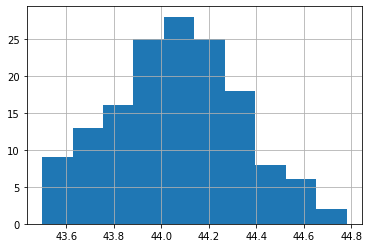

In [16]:
amostras.mean().hist()

In [17]:
dados.Idade.mean()

44.07142113482561

In [18]:
amostras.mean().mean()

44.06422

**Problema dos Sacos de Arroz**

In [19]:
# media amostral
media_amostra = 5050
media_amostra

5050

In [20]:
significancia = 0.05
significancia

0.05

In [21]:
confianca = 1 - significancia
confianca

0.95

In [22]:
0.5 + confianca/2

0.975

In [23]:
from scipy.stats import norm

In [24]:
Z = norm.ppf(0.975)
Z

1.959963984540054

In [25]:
#obtendo sigma: 
desvio_padrao = 150

In [26]:
n = 20
n

20

In [27]:
import numpy as np
raiz_de_n = np.sqrt(n)
raiz_de_n

4.47213595499958

In [28]:
sigma = desvio_padrao/raiz_de_n
sigma

33.54101966249684

In [29]:
erro = Z * sigma
erro
print('A margem de erro é {:.2f}g'.format(erro))

A margem de erro é 65.74g


In [30]:
# intervalo de confiança da média 
intervalo = (
    media_amostra - erro,
    media_amostra + erro
)

In [31]:
intervalo = norm.interval(alpha = 0.95, loc = media_amostra , scale = sigma)
intervalo

(4984.260809456757, 5115.739190543243)

Para estimar o valor médio gasto por cada cliente de uma grande rede de fast-food, foi selecionada uma amostra de 50 clientes.

Assumindo que o valor do desvio padrão da população seja de R$ 6,00 e que esta população se distribui normalmente, obtenha a margem de erro desta estimativa para um nível de confiança de 95%.

In [32]:
z = norm.ppf(0.975)
desvio_padrao = 6
n = 50

e = z * (desvio_padrao / np.sqrt(n))
print("R$ {0:0.2f}".format(e))

R$ 1.66


Uma amostra aleatória simples de 1976 itens de uma população normalmente distribuída, com desvio padrão populacional igual a 11, resultou em uma média amostral de 28.

Qual o intervalo de confiança de 90% para a média populacional?

In [33]:
z = norm.ppf(0.90)
desvio_padrao = 11 
media_amostra = 28
n = 1976 

raiz_de_n = np.sqrt(n)
sigma = desvio_padrao/raiz_de_n

In [34]:
intervalo = norm.interval(alpha = 0.90, loc = media_amostra , scale = sigma)
intervalo

(27.592969951356466, 28.407030048643534)

*Qual dever ser o tamanho da amostra de dados considerando o dp_populacional:*
 
desvio padrao populacional = 3234.39;
Rendimento medio; 
erro maximo = 100;
confianca = 95/100;


In [35]:
0.95/2

0.475

In [36]:
0.475+0.5

0.975

In [38]:
z = norm.ppf(0.975)
z

1.959963984540054

In [39]:
sigma = 3323.39
sigma

3323.39

In [41]:
erro = 100
erro 

100

In [45]:
n = (z*(sigma/erro)) ** 2 
int(n.round())

4243

O valor do gasto médio dos clientes de uma loja de conveniência é de 45,50. 


Assumindo que o desvio padrão dos gastos é igual a R$ 15,00, qual deve ser o tamanho da amostra para estimarmos a média populacional com um nível de significância de 10%? Considere que o erro máximo aceitável seja de 10%.

In [60]:
media = 45.50
sigma = 15.00

erro = 0.10

significancia = .10
conf = 1-significancia
conf

0.9

In [55]:
z = norm.ppf(0.5+(conf/2))
z

1.6448536269514722

In [58]:
erro_absoluto = media*erro
erro_absoluto

4.55

In [84]:
def aproximar(valor_amostra):
    valor_amostra = round(valor_amostra)
    int(valor_amostra)
    print('A quantidade amostral suficiente para se aproximar a média é de {} elementos'.format(valor_amostra))

In [85]:
n = (z*(sigma/erro_absoluto)) ** 2 
aproximar(n)

A quantidade amostral suficiente para se aproximar a média é de 42 elementos


# Pop. Finita

lote de 10.000 latas
amostra aleatoria de 100 latas

*  desvio padrao amostral do conteudo = 12ml
*  erro max sobre a media de 5ml
*  nivel de conf = 95%





In [82]:
# TAMANHO DA POPULAÇÃO IMPORTA!!!

N = 10000
z = norm.ppf(0.5 + (0.95/2))
s = 12
erro = 5

In [86]:
n = ((z**2) * (s**2) * (N)) / (((z**2) * (s**2)) + ((e**2) * (N - 1)))
aproximar(n)

A quantidade amostral suficiente para se aproximar a média é de 196 elementos


Um fabricante de farinha verificou que, em uma amostra aleatória formada por 200 sacos de 25 kg de um lote formado por 2.000 sacos, apresentou um desvio padrão amostral do peso igual a 480 g.

Considerando um erro máximo associado à média populacional igual a 0,3 kg e um nível de confiança igual a 95%, qual tamanho de amostra deveria ser selecionado para obtermos uma estimativa confiável do parâmetro populacional?

In [87]:
N = 2000
N

2000

In [89]:
z = norm.ppf(0.5+(0.95/2))
z

1.959963984540054

In [91]:
s = 480
s

480

In [97]:
e = 300
e

300

In [93]:
confianca=0.95
confianca

0.95

In [98]:
n = ((z**2) * (s**2) * (N)) / (((z**2) * (s**2)) + ((e**2) * (N - 1)))
int(n.round())

10